# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Luis Amaya De Leon
**Date:** 10/06/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [1]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/Fall2025-MS3083-Base_Template/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [5]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print(paste("Column names:", paste(names(messy_sales), collapse = ", ")))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [6]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [ ]:
# **Data Quality Assessment:**

print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

# **YOUR OBSERVATIONS:**

# [Write your detailed observations here after running the code above]

# Much like the previous assignment, it shows the first 10 rows along with its structurres and summaries. Though it would be much easier to read if it were in a table or different format.

[1] "=== DATA STRUCTURE ==="


spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [10]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [ ]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [11]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [12]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [13]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v[!is.na(v)])
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [14]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- get_mode(sales_imputed$Customer_Name)

In [18]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
median_quantity <- median(sales_imputed$Quantity, na.rm = TRUE)
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- median_quantity

In [19]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [20]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [21]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [22]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

# For this dataset, option B would be better because it maintains the same dataset and keeps relationships between variables. 

2. **What are the trade-offs between removal and imputation?**

# The trade-offs here are that removal can 'remove' or lose relevant information, while imputation can introduce bias or discrepancies in the data.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [23]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [26]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales - 1.5 * IQR_sales
lower_threshold <- Q1_sales + 1.5 * IQR_sales

In [27]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: 860.42977188453"
[1] "Upper threshold: 196.627628591842"
[1] "Number of outliers found: 178"
[1] "Outlier rows:"
# A tibble: 178 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 John Smith    Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9           

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


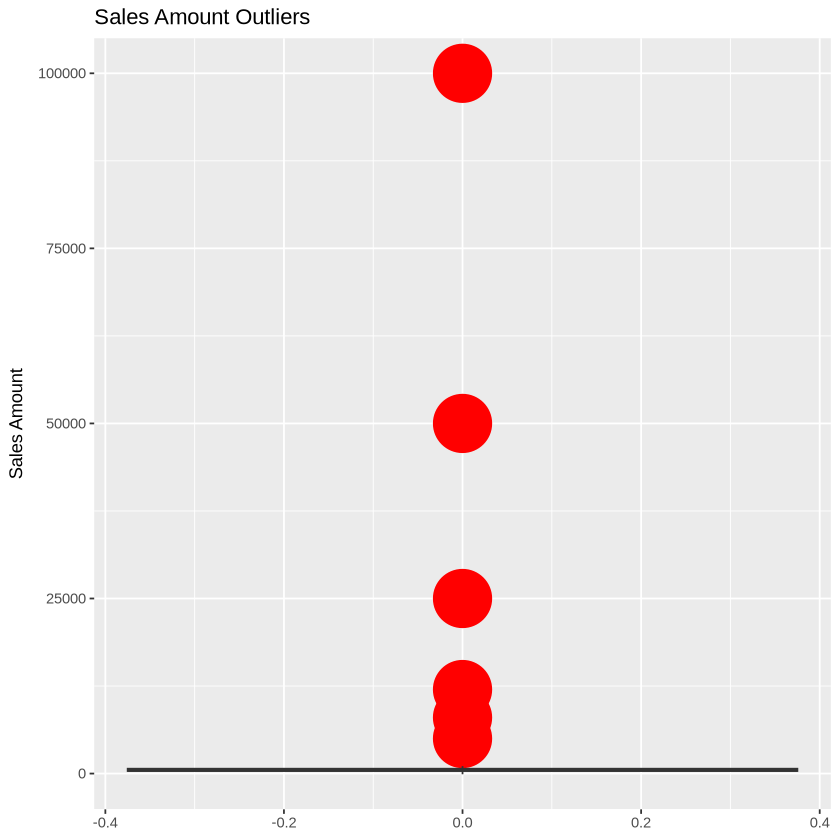

In [28]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + 
  geom_boxplot(outlier.colour = "red", outlier.size = 16) +
  ggtitle("Sales Amount Outliers") +
  ylab("Sales Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [29]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
    filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 0"
[1] "Rows removed: 200"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

In [ ]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- # YOUR CODE HERE
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [30]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 0"
[1] "Rows removed: 200"


In [31]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [32]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
    sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
    ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold, sales_outliers_capped$Sales_Amount)
)

In [33]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] 196.6276 860.4298


In [34]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 178"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [37]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped 

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  196.6   860.4   860.4   815.7   860.4   860.4      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

# I chose this dataset because it preserves the sample size while the data quality has been improved due to the imputation and capping methods used. This approach minimizes loss of information and maintains clean data for analysis requirements. 


### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [38]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows            200            200
2      Missing Values             52             36
3   Mean Sales_Amount        1614.91         815.68
4 Median Sales_Amount         531.29         860.43
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

Removing rows with missing values would most likely be preferred in scenarios where the dataset is large and minimal loss of data will not impact overall analysis. Feedback surveys where few responses lack answers to certain questions could be excluded as long as the majority of responses have all questions answered. Posing minimal risk to overall insights. 

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

outliers in the Sales_amount column represent transactions that are significantly higher or lower than average sales. They should not be removed or treated without understanding, as they could be indicative of special events. If they were errors or anomalies, then treatment would be necessary to ensure accurate analysis. 

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

The presence of missing values and outliers can skew the results of business analytics tasks. Can lead to inaccurate results and become misleading. Forecasting future sales could be significantly impacted if outliers are not treated as they will distort trends and patterns. 

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Removing or modifying data during the cleaning process can lead to misrepresentation of data and potentially biased results. Analysts can ensure transparency by documenting all changes made during the cleaning process and providing clear justifications for any changes made. Data integrity is maintained by ensuring that the original data is preserved and accessible for review. 

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**